# Nexa Wall Street Columns High Resolution (30 x 30) - Same letter prediction
In this notebook we will use the features extracted from Nexa in order to make predictions of the same letter

In [46]:
import numpy as np
from sklearn import svm, cross_validation
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import h5py

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sys
sys.path.append("../")

## Using constant number of data clusters (Ndata = 20)

### Cover all policy

#### Load the data 

In [49]:
# Data to use
Ndata = 10000
Nside = 30

# First we load the file 
file_location = '../results_database/text_wall_street_columns_30_Ndata20.hdf5'

# Now we need to get the letters and align them
text_directory = '../data/wall_street_letters_30.npy'
letters_sequence = np.load(text_directory)
Nletters = len(letters_sequence)
symbols = set(letters_sequence)

targets = []

for index in range(Ndata):
    letter_index = index // Nside
    targets.append(letters_sequence[letter_index])

# Transform to array
targets = np.array(targets)
print(list(enumerate(targets[0:40])))

[(0, 'p'), (1, 'p'), (2, 'p'), (3, 'p'), (4, 'p'), (5, 'p'), (6, 'p'), (7, 'p'), (8, 'p'), (9, 'p'), (10, 'p'), (11, 'p'), (12, 'p'), (13, 'p'), (14, 'p'), (15, 'p'), (16, 'p'), (17, 'p'), (18, 'p'), (19, 'p'), (20, 'p'), (21, 'p'), (22, 'p'), (23, 'p'), (24, 'p'), (25, 'p'), (26, 'p'), (27, 'p'), (28, 'p'), (29, 'p'), (30, 'i'), (31, 'i'), (32, 'i'), (33, 'i'), (34, 'i'), (35, 'i'), (36, 'i'), (37, 'i'), (38, 'i'), (39, 'i')]


#### Do the loop and calculate the predictions

In [50]:
# Calculate the predictions     

scores_mixed = []
scores_indp = []

max_lags = np.arange(2, 17, 2)

# Nexa parameters
Ntime_clusters = 20
Nembedding = 3

In [51]:
for max_lag in max_lags:
    
    print(max_lag)
    Nspatial_clusters = max_lag
    # Here calculate the scores for the mixes
    run_name = '/test' + str(max_lag)
    f = h5py.File(file_location, 'r')

    parameters_string = '/' + str(Nspatial_clusters)
    parameters_string += '-' + str(Ntime_clusters)
    parameters_string += '-' + str(Nembedding)

    nexa = f[run_name + parameters_string]
    cluster_to_index = nexa['cluster_to_index']
    code_vectors_softmax = np.array(nexa['code-vectors-softmax'])

    # Now we need to classify
    X  = code_vectors_softmax[:Ndata]
    y = targets
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.10)

    clf_linear = LinearDiscriminantAnalysis()
    clf_linear.fit(X_train, y_train)
    score = clf_linear.score(X_test, y_test) * 100.0
    scores_mixed.append(score)

    # Here calculate the scores for the independent
    run_name = '/indep' + str(max_lag)
    f = h5py.File(file_location, 'r')
    
    parameters_string = '/' + str(Nspatial_clusters)
    parameters_string += '-' + str(Ntime_clusters)
    parameters_string += '-' + str(Nembedding)

    nexa = f[run_name + parameters_string]
    cluster_to_index = nexa['cluster_to_index']
    code_vectors_softmax = np.array(nexa['code-vectors-softmax'])

    # Now we need to classify
    X  = code_vectors_softmax[:Ndata]
    y = targets
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.10)

    clf_linear = LinearDiscriminantAnalysis()
    clf_linear.fit(X_train, y_train)
    score = clf_linear.score(X_test, y_test) * 100.0
    scores_indp.append(score)

2
4

/home/heberto/miniconda/envs/nexa/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/heberto/miniconda/envs/nexa/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)



6
8
10
12
14
16


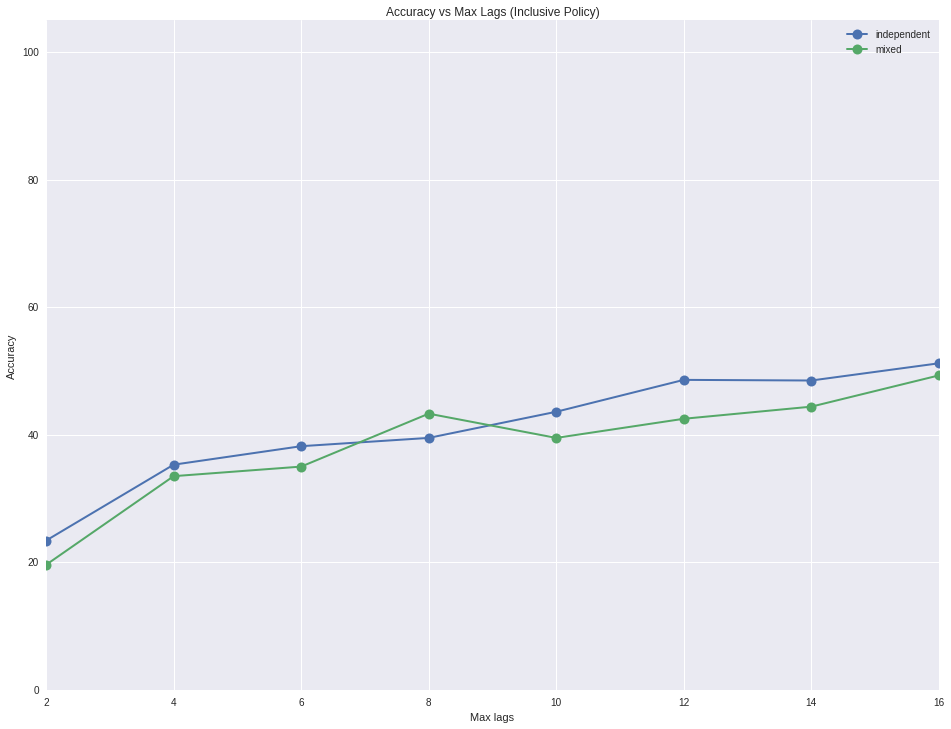

In [52]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(max_lags, scores_indp, 'o-', label='independent', lw=2, markersize=10)
ax.plot(max_lags, scores_mixed, 'o-', label='mixed', lw=2, markersize=10)

ax.set_ylim(0, 105)
ax.set_ylabel('Accuracy')
ax.set_xlabel('Max lags')
ax.set_title('Accuracy vs Max Lags (Inclusive Policy)')
ax.legend()

## Cover Exclusively Policy

#### Load data

In [53]:
# Data to use
Ndata = 10000
Nside = 30

# Calculate the predictions     

scores_mixed = []
scores_indp = []

max_lags = np.arange(2, 17, 2)

# Nexa parameters
Ntime_clusters = 20
Nembedding = 3

# First we load the file 
file_location = '../results_database/text_wall_street_columns_30_Ndata20.hdf5'

# Now we need to get the letters and align them
text_directory = '../data/wall_street_letters_30.npy'
letters_sequence = np.load(text_directory)
Nletters = len(letters_sequence)
symbols = set(letters_sequence)

#### Do the loop

In [13]:
for max_lag in max_lags:
    targets = []
    
    aux = Nside - max_lag
    for index in range(Ndata):
        letter_index = index // aux
        targets.append(letters_sequence[letter_index])
                
    # Transform to array
    targets = np.array(targets)
    
    print(max_lag)
    Nspatial_clusters = max_lag
    # Here calculate the scores for the mixes
    run_name = '/test' + str(max_lag)
    f = h5py.File(file_location, 'r')

    parameters_string = '/' + str(Nspatial_clusters)
    parameters_string += '-' + str(Ntime_clusters)
    parameters_string += '-' + str(Nembedding)

    nexa = f[run_name + parameters_string]
    cluster_to_index = nexa['cluster_to_index']
    code_vectors_softmax = np.array(nexa['code-vectors-softmax'])
    
    # Take only the ondes you need
    index = np.arange(Ndata * 3)
    index = index[(index % 30) < aux]
    code_vectors_softmax = code_vectors_softmax[index, :]
    
    if False:
        print(index[0:40])
        print(code_vectors_softmax.shape)
        print(list(enumerate(targets[0:40])))
        print(targets.size)
        print(code_vectors_softmax.shape)
        print(Ndata)
            
    # Now we need to classify
    X  = code_vectors_softmax[:Ndata]
    y = targets
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.10)

    clf_linear = LinearDiscriminantAnalysis()
    clf_linear.fit(X_train, y_train)
    score = clf_linear.score(X_test, y_test) * 100.0
    scores_mixed.append(score)

    # Here calculate the scores for the independent
    run_name = '/indep' + str(max_lag)
    f = h5py.File(file_location, 'r')
    
    parameters_string = '/' + str(Nspatial_clusters)
    parameters_string += '-' + str(Ntime_clusters)
    parameters_string += '-' + str(Nembedding)

    nexa = f[run_name + parameters_string]
    cluster_to_index = nexa['cluster_to_index']
    code_vectors_softmax = np.array(nexa['code-vectors-softmax'])
    
     # Take only the ondes you need
    index = np.arange(Ndata * 3)
    index = index[(index % 30) < aux]
    code_vectors_softmax = code_vectors_softmax[index, :]

    # Now we need to classify
    X  = code_vectors_softmax[:Ndata]
    y = targets
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.10)

    clf_linear = LinearDiscriminantAnalysis()
    clf_linear.fit(X_train, y_train)
    score = clf_linear.score(X_test, y_test) * 100.0
    scores_indp.append(score)

/home/heberto/miniconda/envs/nexa/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/heberto/miniconda/envs/nexa/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


2
4
6
8
10
12
14
16


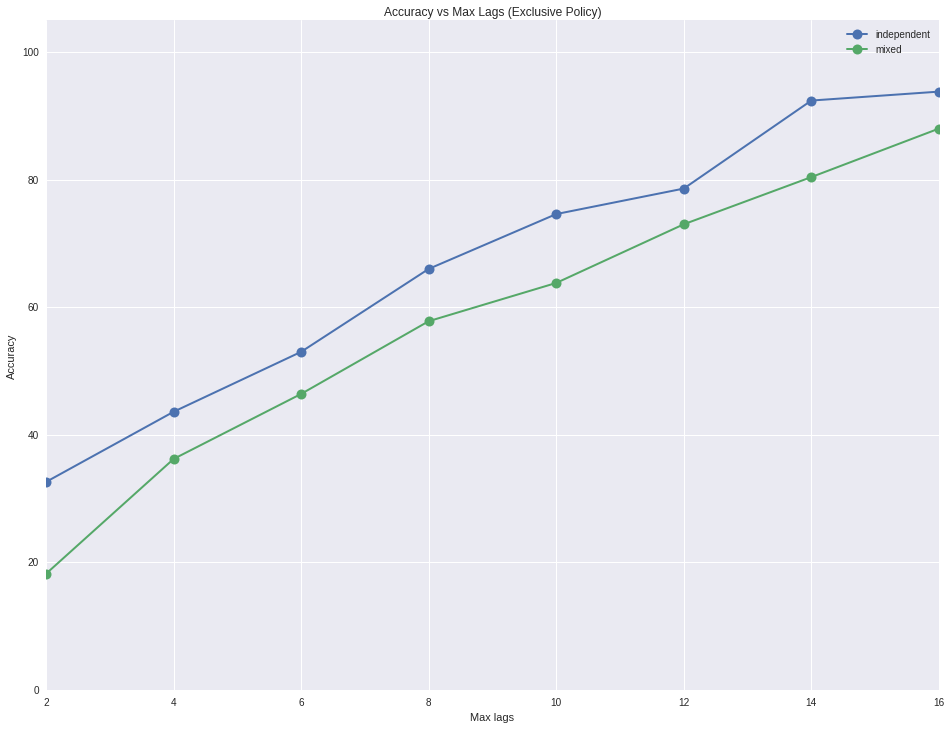

In [14]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(max_lags, scores_indp, 'o-', label='independent', lw=2, markersize=10)
ax.plot(max_lags, scores_mixed, 'o-', label='mixed', lw=2, markersize=10)

ax.set_ylim(0, 105)
ax.set_ylabel('Accuracy')
ax.set_xlabel('Max lags')
ax.set_title('Accuracy vs Max Lags (Exclusive Policy)')
ax.legend()

## Using constant number of features

### Cover all policy

#### Load the data

In [54]:
# Data to use
Ndata = 10000
Nside = 30

# First we load the file 
file_location = '../results_database/text_wall_street_columns_30_semi_constantNdata.hdf5'

# Now we need to get the letters and align them
text_directory = '../data/wall_street_letters_30.npy'
letters_sequence = np.load(text_directory)
Nletters = len(letters_sequence)
symbols = set(letters_sequence)

targets = []

for index in range(Ndata):
    letter_index = index // Nside
    targets.append(letters_sequence[letter_index])

# Transform to array
targets = np.array(targets)
print(list(enumerate(targets[0:40])))

[(0, 'p'), (1, 'p'), (2, 'p'), (3, 'p'), (4, 'p'), (5, 'p'), (6, 'p'), (7, 'p'), (8, 'p'), (9, 'p'), (10, 'p'), (11, 'p'), (12, 'p'), (13, 'p'), (14, 'p'), (15, 'p'), (16, 'p'), (17, 'p'), (18, 'p'), (19, 'p'), (20, 'p'), (21, 'p'), (22, 'p'), (23, 'p'), (24, 'p'), (25, 'p'), (26, 'p'), (27, 'p'), (28, 'p'), (29, 'p'), (30, 'i'), (31, 'i'), (32, 'i'), (33, 'i'), (34, 'i'), (35, 'i'), (36, 'i'), (37, 'i'), (38, 'i'), (39, 'i')]


#### Do the loop and calculate predictions

In [55]:
# Calculate the predictions     

scores_mixed = []
scores_indp = []

max_lags = np.arange(2, 17, 2)

# Nexa parameters
Nembedding = 3

In [56]:
for max_lag in max_lags:
    
    print('lag', max_lag)
    Nspatial_clusters = max_lag
    Ntime_clusters = 60 // max_lag
    print('Ndata_clusters', Ntime_clusters)
    
    # Here calculate the scores for the mixes
    run_name = '/test' + str(max_lag)
    f = h5py.File(file_location, 'r')

    parameters_string = '/' + str(Nspatial_clusters)
    parameters_string += '-' + str(Ntime_clusters)
    parameters_string += '-' + str(Nembedding)

    nexa = f[run_name + parameters_string]
    cluster_to_index = nexa['cluster_to_index']
    code_vectors_softmax = np.array(nexa['code-vectors-softmax'])

    # Now we need to classify
    X  = code_vectors_softmax[:Ndata]
    y = targets
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.10)

    clf_linear = LinearDiscriminantAnalysis()
    clf_linear.fit(X_train, y_train)
    score = clf_linear.score(X_test, y_test) * 100.0
    scores_mixed.append(score)

    # Here calculate the scores for the independent
    run_name = '/indep' + str(max_lag)
    f = h5py.File(file_location, 'r')
    
    parameters_string = '/' + str(Nspatial_clusters)
    parameters_string += '-' + str(Ntime_clusters)
    parameters_string += '-' + str(Nembedding)

    nexa = f[run_name + parameters_string]
    cluster_to_index = nexa['cluster_to_index']
    code_vectors_softmax = np.array(nexa['code-vectors-softmax'])

    # Now we need to classify
    X  = code_vectors_softmax[:Ndata]
    y = targets
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.10)

    clf_linear = LinearDiscriminantAnalysis()
    clf_linear.fit(X_train, y_train)
    score = clf_linear.score(X_test, y_test) * 100.0
    scores_indp.append(score)

lag 2
Ndata_clusters 30
lag 4
Ndata_clusters 15
lag 6
Ndata_clusters 10
lag 8
Ndata_clusters 7
lag 10
Ndata_clusters 6
lag 12
Ndata_clusters 5
lag 14
Ndata_clusters 4
lag 16
Ndata_clusters 3


/home/heberto/miniconda/envs/nexa/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/heberto/miniconda/envs/nexa/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


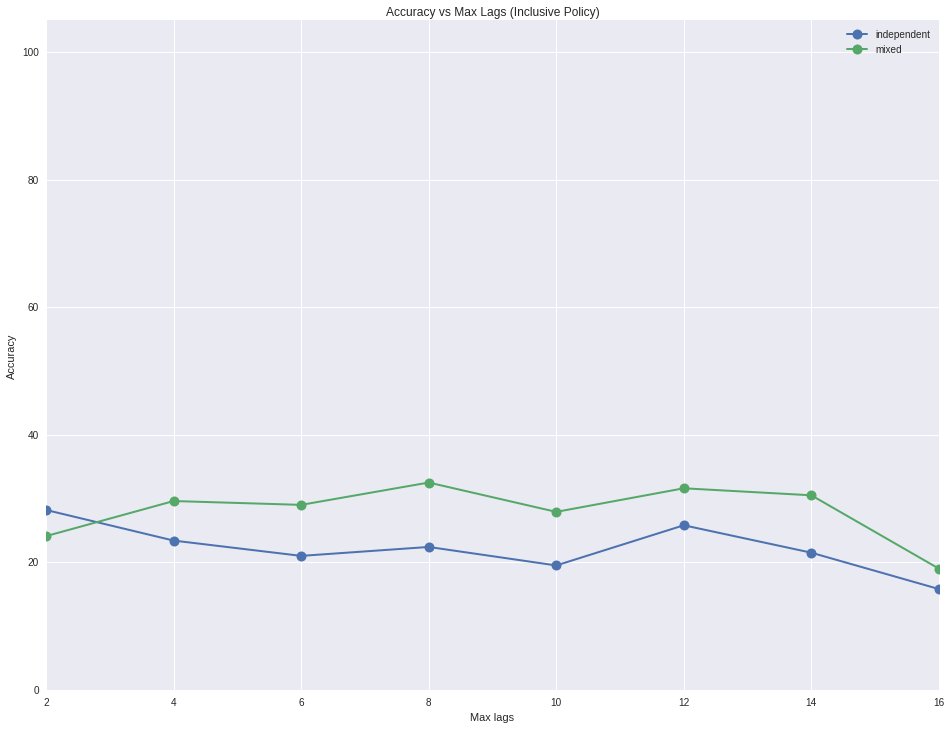

In [57]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(max_lags, scores_indp, 'o-', label='independent', lw=2, markersize=10)
ax.plot(max_lags, scores_mixed, 'o-', label='mixed', lw=2, markersize=10)

ax.set_ylim(0, 105)
ax.set_ylabel('Accuracy')
ax.set_xlabel('Max lags')
ax.set_title('Accuracy vs Max Lags (Inclusive Policy)')
ax.legend()

### Cover Exclusively Policy

#### Load the data

In [58]:
# Data to use
Ndata = 10000
Nside = 30

# Calculate the predictions     

scores_mixed = []
scores_indp = []

max_lags = np.arange(2, 17, 2)

# Nexa parameters
Nembedding = 3

# First we load the file 
file_location = '../results_database/text_wall_street_columns_30_semi_constantNdata.hdf5'

# Now we need to get the letters and align them
text_directory = '../data/wall_street_letters_30.npy'
letters_sequence = np.load(text_directory)
Nletters = len(letters_sequence)
symbols = set(letters_sequence)

#### Do the loop

In [59]:
for max_lag in max_lags:
    targets = []
    
    aux = Nside - max_lag
    
    #Take the corresponding letters
    for index in range(Ndata):
        letter_index = index // aux
        targets.append(letters_sequence[letter_index])
                
    # Transform to array
    targets = np.array(targets)
    
    print('lags', max_lag)
    Nspatial_clusters = max_lag
    Ntime_clusters = 60 // max_lag
    print('Ndata clusters', Ntime_clusters)
    
    # Here calculate the scores for the mixes
    run_name = '/test' + str(max_lag)
    f = h5py.File(file_location, 'r')

    parameters_string = '/' + str(Nspatial_clusters)
    parameters_string += '-' + str(Ntime_clusters)
    parameters_string += '-' + str(Nembedding)
    
    nexa = f[run_name + parameters_string]
    cluster_to_index = nexa['cluster_to_index']
    code_vectors_softmax = np.array(nexa['code-vectors-softmax'])
    
    # Take only the ondes you need
    index = np.arange(Ndata * 3)
    index = index[(index % 30) < aux]
    code_vectors_softmax = code_vectors_softmax[index, :]
    
    if False:
        print(index[0:40])
        print(code_vectors_softmax.shape)
        print(list(enumerate(targets[0:40])))
        print(targets.size)
        print(code_vectors_softmax.shape)
        print(Ndata)
            
    # Now we need to classify
    X  = code_vectors_softmax[:Ndata]
    y = targets
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.10)

    clf_linear = LinearDiscriminantAnalysis()
    clf_linear.fit(X_train, y_train)
    score = clf_linear.score(X_test, y_test) * 100.0
    scores_mixed.append(score)

    # Here calculate the scores for the independent
    run_name = '/indep' + str(max_lag)
    f = h5py.File(file_location, 'r')
    
    parameters_string = '/' + str(Nspatial_clusters)
    parameters_string += '-' + str(Ntime_clusters)
    parameters_string += '-' + str(Nembedding)

    nexa = f[run_name + parameters_string]
    cluster_to_index = nexa['cluster_to_index']
    code_vectors_softmax = np.array(nexa['code-vectors-softmax'])
    
     # Take only the ondes you need
    index = np.arange(Ndata * 3)
    index = index[(index % 30) < aux]
    code_vectors_softmax = code_vectors_softmax[index, :]

    # Now we need to classify
    X  = code_vectors_softmax[:Ndata]
    y = targets
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.10)

    clf_linear = LinearDiscriminantAnalysis()
    clf_linear.fit(X_train, y_train)
    score = clf_linear.score(X_test, y_test) * 100.0
    scores_indp.append(score)

lags 2
Ndata clusters 30
lags 4
Ndata clusters 15
lags 6
Ndata clusters 10
lags 8
Ndata clusters 7
lags 10
Ndata clusters 6
lags 12
Ndata clusters 5
lags

/home/heberto/miniconda/envs/nexa/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/heberto/miniconda/envs/nexa/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


 14
Ndata clusters 4
lags 16
Ndata clusters 3


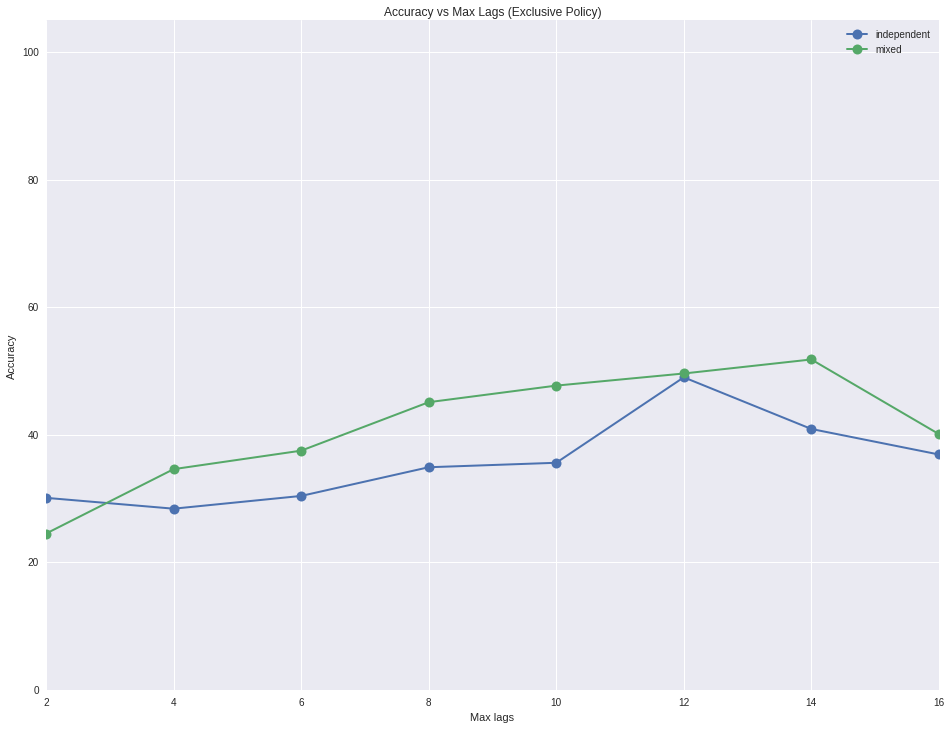

In [60]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(max_lags, scores_indp, 'o-', label='independent', lw=2, markersize=10)
ax.plot(max_lags, scores_mixed, 'o-', label='mixed', lw=2, markersize=10)

ax.set_ylim(0, 105)
ax.set_ylabel('Accuracy')
ax.set_xlabel('Max lags')
ax.set_title('Accuracy vs Max Lags (Exclusive Policy)')
ax.legend()